In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [2]:
#AIRPORT_ICAO = "ESGG"
AIRPORT_ICAO = "ESSA"

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# AIF
filename = AIRPORT_ICAO + "_metrics_AIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# WIF
filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# TIF
filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

# Average Time On Levels

## Medians of Average Time On Levels vs TIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     5.386
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0489
Time:                        20:03:36   Log-Likelihood:                -2.7887
No. Observations:                  10   AIC:                             9.577
Df Residuals:                       8   BIC:                             10.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0785      0.244     16.698      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


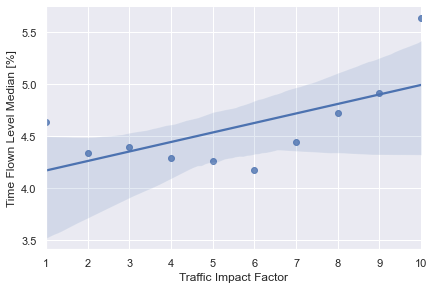

In [3]:
df = metrics_TIF_vertical_PIs_by_hour_df.copy()
df = df[df['numberOfFlights']>0]
p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = group['timeOnLevelsPercentMean']

    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Time Flown Level Median [%]')

#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.13 ESSA: 0.63
# without outliers - ESGG: 0.01 ESSA: 0.4

## Medians of Average Time On Levels vs WIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     49.38
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           0.000110
Time:                        20:03:36   Log-Likelihood:                -6.8170
No. Observations:                  10   AIC:                             17.63
Df Residuals:                       8   BIC:                             18.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0716      0.365      8.406      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


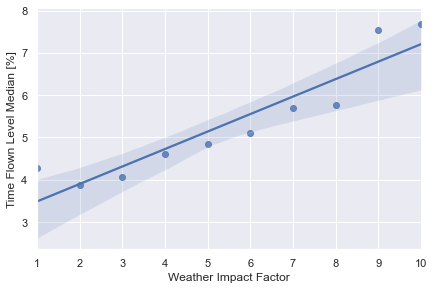

In [4]:
df = metrics_WIF_vertical_PIs_by_hour_df.copy()
df = df[df['numberOfFlights']>0]
p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='WIF'):
    
    idx_df = group['timeOnLevelsPercentMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Time Flown Level Median [%]')

#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.57 ESSA: 0.8
# without outliers - ESGG: 0.71 ESSA: 0.86

## Medians of Average Time On Levels vs AIF¶

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     24.08
Date:                Tue, 28 Dec 2021   Prob (F-statistic):            0.00118
Time:                        20:04:32   Log-Likelihood:                -8.7632
No. Observations:                  10   AIC:                             21.53
Df Residuals:                       8   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2219      0.444      7.258      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


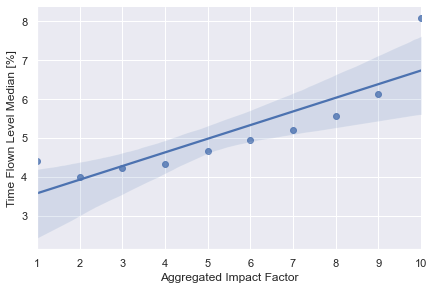

In [6]:
df = metrics_AIF_vertical_PIs_by_hour_df.copy()
#df = df[df['numberOfFlights']>0]
p1 = df["timeOnLevelsPercentMean"].quantile(0.05)
p2 = df["timeOnLevelsPercentMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsPercentMean'] > p1) & (df['timeOnLevelsPercentMean'] < p2) ]

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['AIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='AIF'):
    
    idx_df = group['timeOnLevelsPercentMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'AIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Time Flown Level Median [%]')

#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) 
# with outliers - ESGG: 0.82 ESSA: 0.85
# without outliers - ESGG: 0.61 ESSA: 0.75